In [1]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow
from tensorflow import keras

In [3]:
#base model
base_model = keras.applications.ResNet50(
    weights = 'imagenet',
    input_shape = (224, 224, 3), 
    include_top = False
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [5]:
#importing data
data_folder = '/kaggle/input/d/mahmoudreda55/satellite-image-classification/data'
pre_trained_size = (224, 224)
batch_size =  20

In [6]:
datagen = ImageDataGenerator(rescale = 1/225, validation_split = 0.3)

In [7]:
#training data
train_generator = datagen.flow_from_directory(
    data_folder, 
    target_size = pre_trained_size,
    batch_size = batch_size, 
    class_mode = 'binary',
    subset = 'training'
)

Found 3942 images belonging to 4 classes.


In [8]:
#validation data
validation_generator = datagen.flow_from_directory(
    data_folder, 
    target_size = pre_trained_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)

Found 1689 images belonging to 4 classes.


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import os
%matplotlib inline

In [10]:
#classes 

class_name = list(train_generator.class_indices.keys())
class_name = sorted(class_name)
print(class_name)

['cloudy', 'desert', 'green_area', 'water']


In [11]:
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras import applications
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model


In [12]:
#freezing top layers of base model
for layer in base_model.layers:
    layer.trainable = False

In [13]:
#output from base model
x = base_model.output
x = Flatten()(x)

#dense layer
prediction_layer = Dense(len(class_name), activation = 'sigmoid')(x)

model =  Model(inputs = base_model.input, outputs = prediction_layer)


In [14]:
model.compile(loss= 'crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#model Summary
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,989,124 (91.51 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


**Model Training**

In [15]:
#training model
num_epochs = 10

history = model.fit(train_generator, 
                   steps_per_epoch = train_generator.samples//batch_size,
                   validation_data = validation_generator,
                   validation_steps = validation_generator.samples//batch_size,
                   epochs = num_epochs)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


197/197 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.3208 - loss: 3.2997 - val_accuracy: 0.6625 - val_loss: 0.8584
Epoch 2/10
  1/197 ━━━━━━━━━━━━━━━━━━━━ 4:54 2s/step - accuracy: 0.8500 - loss: 0.6694

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8500 - loss: 0.6694 - val_accuracy: 0.2222 - val_loss: 1.7903
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.5537 - loss: 1.1541 - val_accuracy: 0.6857 - val_loss: 0.8195
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5000 - loss: 1.0351 - val_accuracy: 0.8889 - val_loss: 0.7134
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.6002 - loss: 0.9904 - val_accuracy: 0.7506 - val_loss: 0.8343
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8500 - loss: 0.6800 - val_accuracy: 0.8889 - val_loss: 0.5612
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.6659 - loss: 0.7879 - val_accuracy: 0.8554 - val_loss: 0.5638
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7000 - loss: 0.5934 - val_accuracy: 0.2222 - val_loss: 1.6526
Epoch 9/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.6725 - loss: 0.6776 - val_accuracy: 0.7304 - 

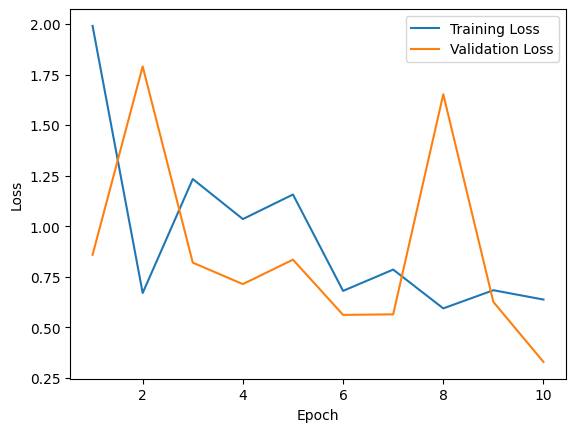

In [16]:
#plotting loss curve
%matplotlib inline
from matplotlib import pyplot as plt

epoch_num = range(1, num_epochs+1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(epoch_num, training_loss, label='Training Loss')
plt.plot(epoch_num, validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

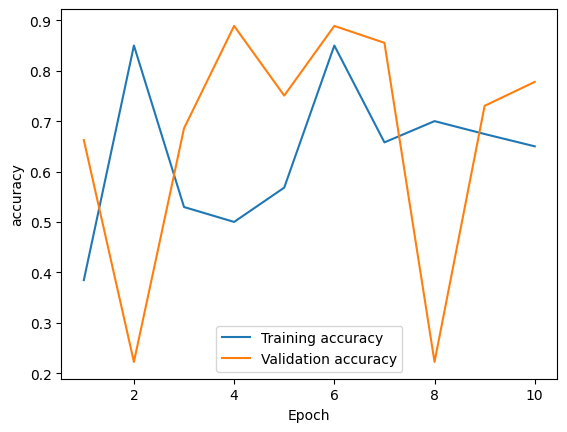

In [17]:
#plotting accuracy
epoch_num = range(1, num_epochs+1)
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(epoch_num, training_accuracy, label='Training accuracy')
plt.plot(epoch_num, validation_accuracy, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Testing the Model**

In [18]:
X_test = validation_generator[0][0]
y_test = validation_generator[0][1]


In [19]:
X_test.shape

(20, 224, 224, 3)

In [20]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [21]:
y_pred.shape

(20, 4)

In [22]:
y_pred = np.argmax(y_pred, axis=1)

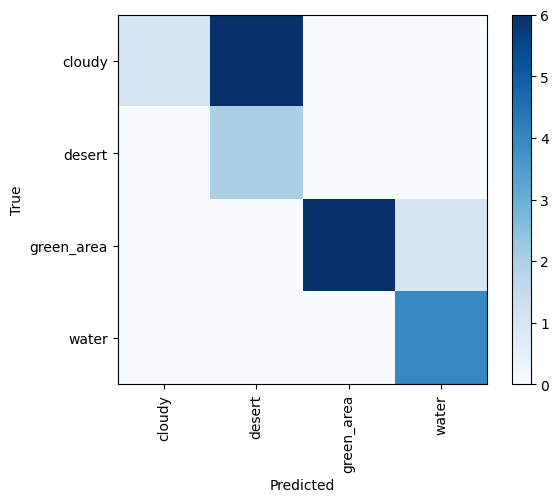

In [29]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues) 
plt.colorbar()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name, rotation=90)
plt.yticks(tick_marks, class_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
import numpy as np
from  sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [26]:
import os
os. getcwd()

model_file_name = 'model.h5'
model.save(model_file_name)

In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# loading the image
image_path = '/kaggle/input/d/mahmoudreda55/satellite-image-classification/data/water/SeaLake_1006.jpg'  

# Preprocess the image
img = image.load_img(image_path, target_size=(224, 224))  # Matching the input size used during training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0 


predictions = model.predict(img_array)

predicted_class_index = np.argmax(predictions)

#predicting class
predicted_class_name = class_name[predicted_class_index]

print(f"The predicted class for the image is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
The predicted class for the image is: water
